<h3>Trabalho 2 - Análise Estatística de Dados</h3>
Aluno: Rennê Ruan Alves Oliveira


In [55]:
import pandas as pd
import numpy as np

In [56]:
df = pd.read_csv("notas.csv")
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


<h3>Valores estatísticos para a coluna SAT</h3>


In [57]:
# Média e desvio padrão

media_sat = df["SAT"].mean()
desvio_sat = df["SAT"].std()
moda_sat = df["SAT"].mode()

print(f"Média de SAT: {round(media_sat,2)}")
print(f"Desvio Padrão de SAT: {round(desvio_sat,2)}")
print(f"Moda de SAT: {moda_sat[0]}")

Média de SAT: 1845.27
Desvio Padrão de SAT: 104.53
Moda de SAT: 1850


In [58]:
from prettytable import PrettyTable

tabela = PrettyTable()

# Adicionar nomes das colunas
tabela.field_names = ["Dados SAT", "Valores"]

# Adicionar registros à tabela
tabela.add_row(["Média", round(media_sat, 2)])
tabela.add_row(["Desvio-padrão", round(desvio_sat, 2)])
tabela.add_row(["Moda 1", moda_sat[0]])
tabela.add_row(["Moda 2", moda_sat[1]])

# Exibir a tabela
print(tabela)

+---------------+---------+
|   Dados SAT   | Valores |
+---------------+---------+
|     Média     | 1845.27 |
| Desvio-padrão |  104.53 |
|     Moda 1    |   1850  |
|     Moda 2    |   1934  |
+---------------+---------+


Apresentar o histograma junto com a curva normal


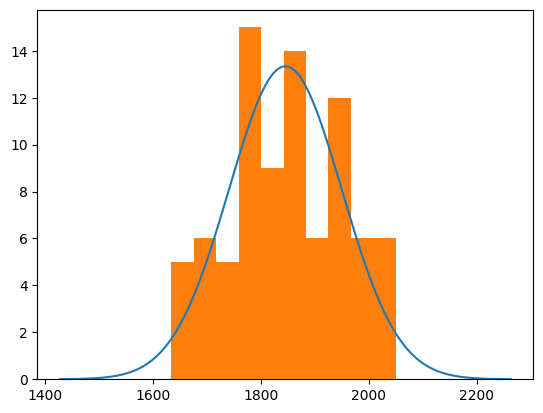

In [59]:
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.arange(media_sat - 4 * desvio_sat, media_sat + 4 * desvio_sat, 0.001)
y = norm.pdf(x, media_sat, desvio_sat)

N = len(df["SAT"])
num_separacoes = 10  # Considerando a utilização de 10 categorias
largura_separacoes = (df["SAT"].max() - df["SAT"].min()) / num_separacoes
plt.plot(x, y * N * largura_separacoes)

plt.hist(df["SAT"], num_separacoes)
plt.show()

Gráfico de dispersão, com o eixo X os dados de GPA e eixo Y dados SAT


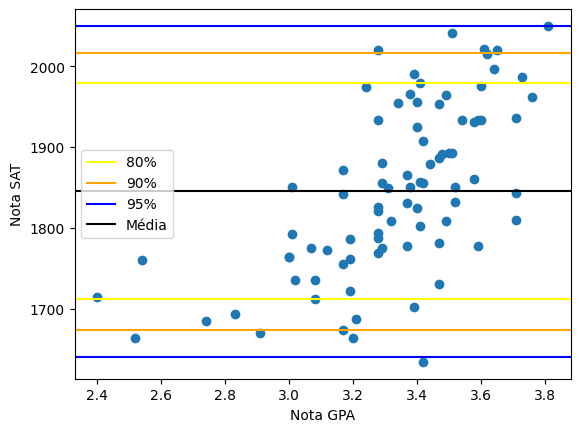

In [60]:
import matplotlib.lines as mlines

plt.scatter(df["GPA"], df["SAT"])
plt.xlabel("Nota GPA")
plt.ylabel("Nota SAT")

limites = {80: 1.28, 90: 1.64, 95: 1.96}

plt.axhline(media_sat, color="black")


def mostra_limite_sat(media, desvio, porcentagem, color):
    li = media - limites[porcentagem] * desvio
    ls = media + limites[porcentagem] * desvio
    plt.axhline(li, color=color)
    plt.axhline(ls, color=color)

    return li, ls


li_80, ls_80 = mostra_limite_sat(media_sat, desvio_sat, porcentagem=80, color="yellow")
li_90, ls_90 = mostra_limite_sat(media_sat, desvio_sat, porcentagem=90, color="orange")
li_95, ls_95 = mostra_limite_sat(media_sat, desvio_sat, porcentagem=95, color="blue")

yellow_line = mlines.Line2D([], [], color="yellow", markersize=15, label="80%")
orange_line = mlines.Line2D([], [], color="orange", markersize=15, label="90%")
blue_line = mlines.Line2D([], [], color="blue", markersize=15, label="95%")
black_line = mlines.Line2D([], [], color="black", markersize=15, label="Média")

plt.legend(handles=[yellow_line, orange_line, blue_line, black_line])

plt.show()

Tabela com dados nos intervalos de linha de corte 80, 90 e 95 porcento


In [61]:
table_limites = PrettyTable()

# Adicionar nomes das colunas
table_limites.field_names = [
    "Pontos fora do intervalo",
    "Encontrados",
    "Quantidade esperados",
]

dados_80 = df[(df["SAT"] < li_80) | (df["SAT"] > ls_80)]
dados_90 = df[(df["SAT"] < li_90) | (df["SAT"] > ls_90)]
dados_95 = df[(df["SAT"] < li_95) | (df["SAT"] > ls_95)]

quantia_total_chuva = len(df)

# Adicionar registros à tabela
table_limites.add_row(["80%", len(dados_80), 0.2 * quantia_total_chuva])
table_limites.add_row(["90%", len(dados_90), 0.1 * quantia_total_chuva])
table_limites.add_row(["95%", len(dados_95), 0.05 * quantia_total_chuva])

# Exibir a tabela
print(table_limites)

+--------------------------+-------------+----------------------+
| Pontos fora do intervalo | Encontrados | Quantidade esperados |
+--------------------------+-------------+----------------------+
|           80%            |      18     |         16.8         |
|           90%            |      9      |         8.4          |
|           95%            |      1      |         4.2          |
+--------------------------+-------------+----------------------+


Temos que os pontos encontrados dos intervalos possuem valores próximos a porcentagem esperada, com exceção dos além de 95% que apresenta menos pontos extremos do que o calculado.

De forma qualitativa conseguimos observar para os parâmetros utilizados que o gráfico de frequência dos valores de SAT, possui um comportamento semelhante a distribuição normal, apresentando a concentração de pontos perto dos valores de média, porém apresentando menos valores nos extremos. Se analisassemos uma quantia maior de resultados talvez observássemos uma maior aderência a curva normal.


<h3>Valores estatísticos para coluna GPA</h3>


In [62]:
# Média e desvio padrão

media_gpa = df["GPA"].mean()
desvio_gpa = df["GPA"].std()
moda_gpa = df["GPA"].mode()

In [63]:
from prettytable import PrettyTable

tabela = PrettyTable()

# Adicionar nomes das colunas
tabela.field_names = ["Dados GPA", "Valores"]

# Adicionar registros à tabela
tabela.add_row(["Média", round(media_gpa, 2)])
tabela.add_row(["Desvio-padrão", round(desvio_gpa, 2)])
tabela.add_row(["Moda", moda_gpa[0]])
# Exibir a tabela
print(tabela)

+---------------+---------+
|   Dados GPA   | Valores |
+---------------+---------+
|     Média     |   3.33  |
| Desvio-padrão |   0.27  |
|      Moda     |   3.28  |
+---------------+---------+


Apresentar o histograma junto com a curva normal


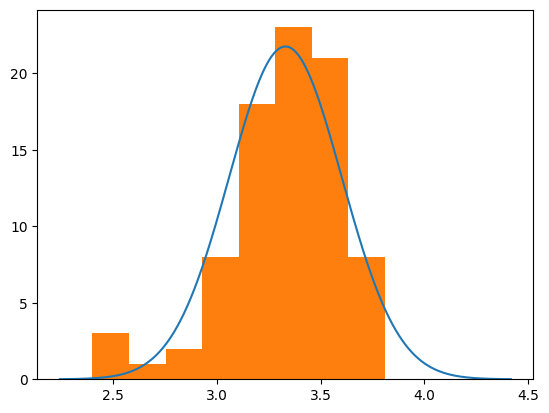

In [64]:
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.arange(media_gpa - 4 * desvio_gpa, media_gpa + 4 * desvio_gpa, 0.001)
y = norm.pdf(x, media_gpa, desvio_gpa)

N = len(df["GPA"])
num_separacoes = 8  # Considerando a utilização de 10 categorias
largura_separacoes = (df["GPA"].max() - df["GPA"].min()) / num_separacoes
plt.plot(x, y * N * largura_separacoes)

plt.hist(df["GPA"], num_separacoes)
plt.show()

Gráfico de dispersão, com o eixo X os dados de SAT e eixo Y dados GPA


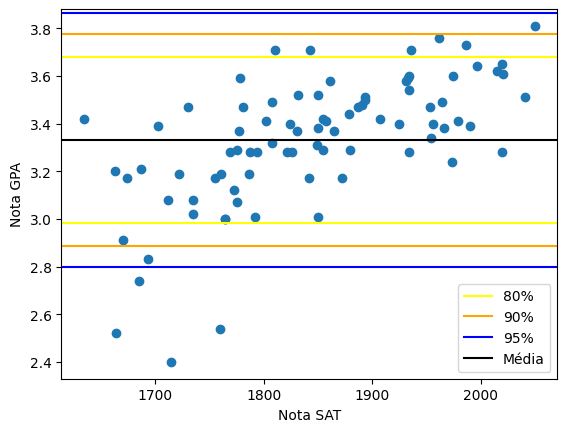

In [65]:
import matplotlib.lines as mlines

plt.scatter(df["SAT"], df["GPA"])
plt.xlabel("Nota SAT")
plt.ylabel("Nota GPA")

limites = {80: 1.28, 90: 1.64, 95: 1.96}

plt.axhline(media_gpa, color="black")


def mostra_limite_gpa(media, desvio, porcentagem, color):
    li = media - limites[porcentagem] * desvio
    ls = media + limites[porcentagem] * desvio
    plt.axhline(li, color=color)
    plt.axhline(ls, color=color)

    return li, ls


li_80, ls_80 = mostra_limite_gpa(media_gpa, desvio_gpa, porcentagem=80, color="yellow")
li_90, ls_90 = mostra_limite_gpa(media_gpa, desvio_gpa, porcentagem=90, color="orange")
li_95, ls_95 = mostra_limite_gpa(media_gpa, desvio_gpa, porcentagem=95, color="blue")

yellow_line = mlines.Line2D([], [], color="yellow", markersize=15, label="80%")
orange_line = mlines.Line2D([], [], color="orange", markersize=15, label="90%")
blue_line = mlines.Line2D([], [], color="blue", markersize=15, label="95%")
black_line = mlines.Line2D([], [], color="black", markersize=15, label="Média")

plt.legend(handles=[yellow_line, orange_line, blue_line, black_line])

plt.show()

Tabela com dados nos intervalos de linha de corte 80, 90 e 95 porcento


In [66]:
table_limites = PrettyTable()

# Adicionar nomes das colunas
table_limites.field_names = [
    "Pontos fora do intervalo",
    "Encontrados",
    "Quantidade esperados",
]

dados_80 = df[(df["GPA"] < li_80) | (df["GPA"] > ls_80)]
dados_90 = df[(df["GPA"] < li_90) | (df["GPA"] > ls_90)]
dados_95 = df[(df["GPA"] < li_95) | (df["GPA"] > ls_95)]

quantia_total_chuva = len(df)

# Adicionar registros à tabela
table_limites.add_row(["80%", len(dados_80), 0.2 * quantia_total_chuva])
table_limites.add_row(["90%", len(dados_90), 0.1 * quantia_total_chuva])
table_limites.add_row(["95%", len(dados_95), 0.05 * quantia_total_chuva])

# Exibir a tabela
print(table_limites)

+--------------------------+-------------+----------------------+
| Pontos fora do intervalo | Encontrados | Quantidade esperados |
+--------------------------+-------------+----------------------+
|           80%            |      12     |         16.8         |
|           90%            |      6      |         8.4          |
|           95%            |      4      |         4.2          |
+--------------------------+-------------+----------------------+


Temos para o GPA inicialmente o mesmo comportamento para o SAT, em que os pontos encontrados nos intervalos possuem valores próximos a porcentagem esperada, porém ao observarmos o gráfico de dispersão, percebemos que os 4 valores encontrados fora dos limites de 95%, estão apresentados unicamente no limite inferior dos dados. Observamos então os concentrados nos menores valores e ao meio rodeando a média. Realizando o comparativo do gráfico com a linha normal, conseguimos observar a presença de uma quantia considerável de dados no extremo da cauda, neste caso, podemos pensar em utilizar outra distribuição que não a normal que melhor se adapte a esta curva, ou tratar estes casos de limite inferior como outliers.


<h3>Relação entre SAT e GPA</h3>

*fazer uma análise de regressão linear entre os pontos do SAT e GPA
*fazer um gráfico de dispersão entre SAT e GPA
*calcular os valores de R e R² (coloque esses dados em uma tabela)
*com base nos seus dados, dizer se os dados apresentam correlação fraca, média ou forte


Text(0, 0.5, 'Nota GPA')

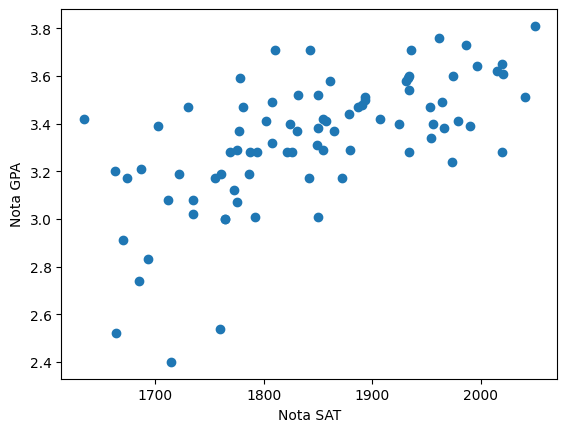

In [67]:
# Iremos mostrar os pontos de dispersão entre o SAT e GPA novamente, agora sem as linhas de limite

plt.scatter(df["SAT"], df["GPA"])
plt.xlabel("Nota SAT")
plt.ylabel("Nota GPA")

Considerando o que foi discutido em sala, temos a problemática de tentar descobrir se a nota SAT dos alunos ao ingressar na faculdade consegue predizer o quão bom será seu índice acadêmico, ou se há alguma mudança no comportamento dos mesmos ao longo da graduação. Devido a isso mantemos o SAT como variável independente e o GPA como variável dependente, ou seja como o GPA irá variar de acordo com os valores de SAT.


In [68]:
from sklearn.linear_model import LinearRegression

X = df["SAT"].values.reshape(-1, 1)
y = df["GPA"]
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Podemos imprimir novamente o gráfico de dispersão, em conjunto com os resultados da linha de regressão.


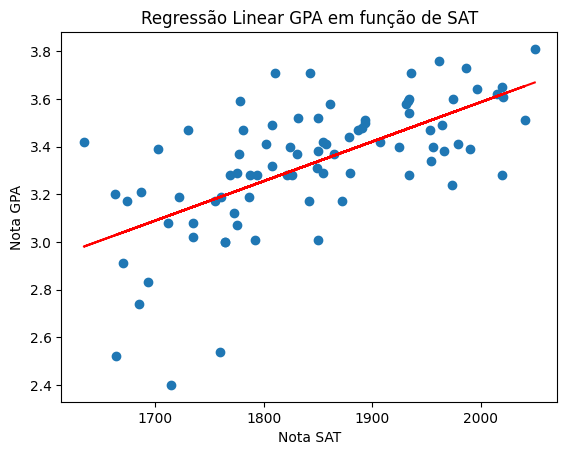

In [69]:
plt.scatter(df["SAT"], df["GPA"])
plt.xlabel("Nota SAT")
plt.ylabel("Nota GPA")

linear_results = model.coef_[0] * X + model.intercept_  # Equação da reta
plt.plot(X, linear_results, color="red")
plt.title("Regressão Linear GPA em função de SAT")
plt.show()

In [70]:
r_values = df.corr("pearson")
r = r_values["GPA"]["SAT"]
r_square = r**2

In [71]:
table_limites = PrettyTable()

# Adicionar nomes das colunas
table_limites.field_names = ["", "Valores"]

# Adicionar registros à tabela
table_limites.add_row(["R", round(r, 2)])
table_limites.add_row(["R²", f"{round(r_square,3)} ({round(r_square*100,2)}%)"])

# Exibir a tabela
print(table_limites)

+----+---------------+
|    |    Valores    |
+----+---------------+
| R  |      0.64     |
| R² | 0.406 (40.6%) |
+----+---------------+


A partir do valor R obtido, temos que a variável GPA possui uma correlação média com a variável SAT (0.64), aproximadamente 40% do valor de GPA é predito pelo valor de SAT, possuindo uma correlação positiva, ou seja, a medida que o SAT aumenta, o GPA aumenta em conjunto.
